<a href="https://colab.research.google.com/github/OmprakashDebata/Bike-Sharing-Demand-Regression/blob/main/Bike_sharing_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction(Regression)



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**    - Omprakash Debata

# **Project Summary -**

This independent project's primary objective was to enhance urban mobility through bike-sharing programs in Seoul, South Korea, by accurately predicting bike rental demand. The project encompassed various essential stages, including data collection, exploration, model selection, and deployment. Leveraging historical data on factors like temperature and time, the aim was to maintain a consistent supply of bikes for rental within metropolitan areas.

- The dataset contained 8760 records and comprised 14 attributes.

- The initial steps involved importing the dataset and essential libraries, followed by a comprehensive exploratory data analysis (EDA) phase.    

-  We employed a combination of visualizations and statistical analyses, encompassing histograms, scatter plots, and correlation matrices, to unveil underlying patterns and relationships within the dataset.

- To prepare the data for machine learning models, we meticulously addressed outliers and null values, and performed necessary transformations to ensure data compatibility.

- The process of model selection entailed an exhaustive exploration of multiple regression models, including Linear Regression, Ridge Regression, Lasso Regression as well as Random Forest and Gradient Boosting.

- To fine-tune model performance independently, we employed techniques like GridSearchCV for hyperparameter optimization.

- Model performance was independently assessed using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).



The independent Seoul Bike Rental Demand Prediction project serves as a compelling example of autonomous proficiency in managing intricate data science endeavors. Its accomplishments, including the generation of valuable insights and predictive capabilities, carry significant implications for the optimization of bike rental services in Seoul. This extends to potential applications in resource allocation and the enhancement of the overall user experience. Beyond its immediate scope, the project serves as a testament to the capacity for independent data science work and signals substantial opportunities for future development and broader applications within the realm of urban transportation and beyond.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The primary aim of this project was to create a precise machine learning model capable of predicting the demand for bikes at diverse times and locations throughout the city. This predictive capability plays a pivotal role in optimizing bike distribution, mitigating shortages, and enhancing the overall user experience. The project encompassed an extensive array of tasks, including thorough data exploration, preprocessing, feature engineering, and the utilization of regression models. Noteworthy techniques applied included hypothesis testing, VIF (Variance Inflation Factor) analysis, and the implementation of various regression algorithms. Despite encountering challenges during data preprocessing and model fine-tuning, the project reached a successful conclusion with the development of a user-friendly web application, providing real-time demand predictions for the Seoul Bike Rental Company.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [187]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Datetime Libraries
from datetime import datetime
import calendar

import scipy.stats as stats

# Hypothesis testing
import statsmodels.api as sm

#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Data Splitting
from sklearn.model_selection import train_test_split

#Standard scaler
from sklearn.preprocessing import StandardScaler

# Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Regression Models
from sklearn.linear_model import LinearRegression

# Regularized Regression
from sklearn.linear_model import Ridge, Lasso

#Bagging model
from sklearn.ensemble import RandomForestRegressor

#Boosting models
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Dataset Loading

In [188]:
# Load Dataset
bike_data = pd.read_csv("/content/SeoulBikeData.csv", encoding='ISO-8859-1')
bike_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset First View

In [189]:
# Dataset First Look
bike_data.head().T

,0,1,2,3,4
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [190]:
# Dataset Tail Look
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [191]:
# Dataset Rows & Columns count
print("columns of dataset --",bike_data.columns)
print("columns count =",len(bike_data.axes[0]))

columns of dataset -- Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
columns count = 8760


In [192]:
# Dataset Rows count
print("Number of rows:",bike_data.shape[0])

Number of rows: 8760


In [193]:
# Dataset shape
bike_data.shape

(8760, 14)

### Dataset Information

In [194]:
# Dataset Info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [195]:
# Dataset Duplicate Value Count
duplicate_values = bike_data.duplicated().sum()
print('Duplicate rows in bike dataset: ',duplicate_values)

Duplicate rows in bike dataset:  0


#### Missing Values/Null Values

In [196]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "---"*10)
print(bike_data.isnull().sum())

Missing Values in each column
------------------------------
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


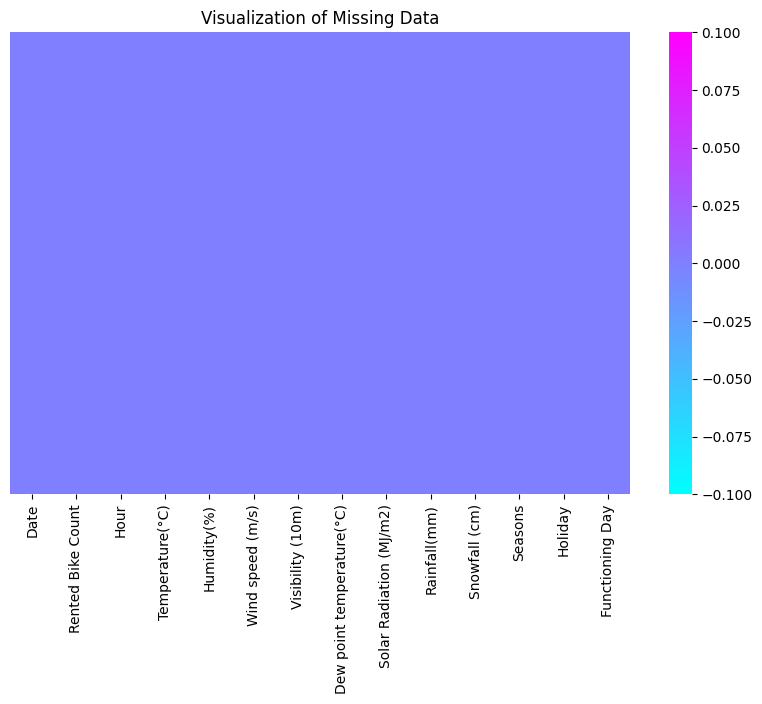

In [197]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(bike_data.isnull(), cmap='cool', annot=False, yticklabels=False)
plt.title('Visualization of Missing Data')
plt.show()

### What did you know about your dataset?

By exploring SeoulBikeRental dataset following insights were found:

The dataset has 8760 Records & 16 Features . Features are described below -

- Date : Bike rental date.
- Rented_Bike_Count : Count of bikes rented per hour.
- Hour : Time of the day (0-23).
- Temperature(°C) : Temperature in degrees Celsius.
- Humidity(%) : Humidity percentage.
- Windspeed(m/s) : Wind speed in meters per second.
- Visibility(10m) : Visibility in meters.
- Dew point temperature(°C) : Dew point temperature in degrees Celsius.
- Solar Radiation (MJ/m2) : Solar radiation in MegaJoules per square meter.
- Rainfall(mm) : Rainfall in millimeters.
- Snowfall (cm) : Snowfall in centimeters.
- Seasons : Season of the year (spring, summer, fall, winter).
- Holiday : Indicates whether it's a holiday.
- Functional Day : Indicates whether it's a functional day (working day).

No such missing value as well as duplicate data were found from the data set.

Also we found that among all 16 features

- There are four categorical columns in the dataset: "Functional Day", "Holiday", "Seasons" and "Date". To enhance analysis, "Date" should be transformed into a datetime type to extract day, month, and year values. Meanwhile, the remaining three columns, "Functional Day", "Holiday" and "Seasons", need to be converted into numerical format using encoding techniques.
- Rest 10 are numerical coulmns.

# Changing datatype

In [198]:
#Converting to date type
bike_data['Date'] = pd.to_datetime(bike_data['Date'], infer_datetime_format=True)

##Extracting date, month, year from date and adding to dataset

#Extracting month from date column
bike_data['Month'] = bike_data['Date'].dt.month

#Extracting day name from date
bike_data['Day'] = bike_data['Date'].dt.day_name()

#Extracting year
bike_data['Year'] = bike_data['Date'].dt.year

#Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_data['Weekdays_or_weekend']=bike_data['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,Weekdays_or_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0


In [199]:
bike_data.drop(['Date', 'Day', 'Year'], axis=1, inplace=True)

In [200]:
bike_data.shape

(8760, 15)

## ***2. Understanding Your Variables***

In [201]:
# Dataset Columns
print(bike_data.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Weekdays_or_weekend'],
      dtype='object')


In [202]:
# renaming the column name
bike_data.rename({'Temperature(°C)': 'Temperature',
                  'Humidity(%)': 'Humidity',
                  'Rented Bike Count': 'Rented_bike_count',
                  'Wind speed (m/s)': 'Wind_speed',
                  'Visibility (10m)': 'Visibility',
                  'Dew point temperature(°C)': 'Dew_point_temperature',
                  'Solar Radiation (MJ/m2)': 'Solar_radiation',
                  'Rainfall(mm)': 'Rainfall',
                  'Snowfall (cm)': 'Snowfall',
                  'Functioning Day': 'Functioning_day'},
                  axis = 1, inplace = True)

In [203]:
print(bike_data.columns)

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'Month',
       'Weekdays_or_weekend'],
      dtype='object')


In [204]:
# Dataset Describe
numerical_columns = ['Rented_bike_count', 'Temperature', 'Humidity', 'Wind_speed',
                     'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall', 'Snowfall']
bike_data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Rented_bike_count,8760.0,704.602055,644.997468,0.0,191.0,504.50,1065.25,3556.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.5,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.0,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.9,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.0,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.7,5.10,14.80,27.20
Solar_radiation,8760.0,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.0,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.0,0.00,0.00,8.80


### Variables Description

- When analyzing data using a DataFrame, the default behavior is to provide insights for numeric columns. If the DataFrame contains only object and categorical data types, with no numeric columns, the default analysis will include both the object and categorical columns. However, when you specify include = 'all' as an option, the result will encompass attributes from both types, providing a comprehensive analysis that combines the characteristics of each.

- Extensive data cleaning isn't necessary because the numerical columns seem to have reasonable value ranges. However, some columns like Wind_speed, Dew_point_temperature, Solar_Radiation, Rainfall, and Snowfall exhibit skewness, evident from their median (50th percentile), which is considerably lower than their highest values.

- The categorical columns, namely Seasons, Holiday, Functioning_day, and Month, have multiple levels, which makes them less suitable for the describe() method. On the other hand, the numerical columns Hour and Weekdays_or_weekend exhibit behavior akin to categorical features. Therefore, we can examine their unique values and frequency counts to gain insights into their distribution and the variety of characteristics they represent.

### Check Unique Values for each variable.

In [205]:
# Check Unique Values for each variable.

## Check the unique values for Hour column
print("Hours =",bike_data["Hour"].unique())

# number of unique values in Hour column
print("Unique count =",bike_data["Hour"].nunique())

Hours = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique count = 24


In [206]:
## Check the unique values for Rented bike count column
print("Rented_bike_count =", bike_data["Rented_bike_count"].unique())

# number of unique values in Rented bike count column
print("Unique count =", bike_data["Rented_bike_count"].nunique())

Rented_bike_count = [ 254  204  173 ... 1538  804  595]
Unique count = 2166


In [207]:
## Check the unique values for Rented bike count column
print("Seasons =", bike_data["Seasons"].unique())

# number of unique values in Rented bike count column
print("Unique count =", bike_data["Seasons"].nunique())

Seasons = ['Winter' 'Spring' 'Summer' 'Autumn']
Unique count = 4


In [208]:
## Check the unique values for Holiday column
print("Holiday =",bike_data["Holiday"].unique())

# number of unique values in Holiday column
print("Unique count =",bike_data["Holiday"].nunique())

Holiday = ['No Holiday' 'Holiday']
Unique count = 2


In [209]:
## Check the unique values for Functioning_day column
print("Functioning_day =",bike_data["Functioning_day"].unique())

# number of unique values in Functioning_day column
print("Unique count =",bike_data["Functioning_day"].nunique())

Functioning_day = ['Yes' 'No']
Unique count = 2


In [210]:
## Check the unique values for Month column
print("Months =",bike_data["Month"].unique())

# number of unique values in Month column
print("Unique count =",bike_data["Month"].nunique())

Months = [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique count = 12


In [211]:
## Check the unique values for the Weekdays_or_weekend column
print("Weekdays_or_weekend =",bike_data["Weekdays_or_weekend"].unique())

# number of unique values in Weekdays_or_weekend column
print("Unique count =",bike_data["Weekdays_or_weekend"].nunique())

Weekdays_or_weekend = [0 1]
Unique count = 2


In [212]:
bike_data.shape

(8760, 15)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [213]:
## Question-1: How does the time of day influence bike rental counts across different season?

season_hour_rented = round(bike_data.groupby(['Seasons', 'Hour'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each hour in seasons: \n" + "---"*12)
print(season_hour_rented)

Bike rental by each hour in seasons: 
------------------------------------
   Seasons  Hour  Rented_bike_count
0   Autumn     0              624.0
1   Autumn     1              486.0
2   Autumn     2              332.0
3   Autumn     3              226.0
4   Autumn     4              149.0
..     ...   ...                ...
91  Winter    19              304.0
92  Winter    20              243.0
93  Winter    21              240.0
94  Winter    22              225.0
95  Winter    23              173.0

[96 rows x 3 columns]


In [214]:
## Question-2: Is there a significant disparity in bike rental counts between hour and months?

hour_month_rented = round(bike_data.groupby(['Hour', 'Month'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each hour in months: \n" + "---"*13)
print(hour_month_rented)

Bike rental by each hour in months: 
---------------------------------------
     Hour  Month  Rented_bike_count
0       0      1              315.0
1       0      2              300.0
2       0      3              411.0
3       0      4              526.0
4       0      5              632.0
..    ...    ...                ...
283    23      8              884.0
284    23      9              657.0
285    23     10              710.0
286    23     11              583.0
287    23     12              381.0

[288 rows x 3 columns]


In [215]:
## Question-3:  What are the monthly variations in bike rental counts and do these patterns differ between weekdays and weekends?

month_weekday_rented = round(bike_data.groupby(['Month', 'Weekdays_or_weekend'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each month in weekday or weekend: \n" + "---"*16)
print(month_weekday_rented)

Bike rental by each month in weekday or weekend: 
------------------------------------------------
    Month  Weekdays_or_weekend  Rented_bike_count
0       1                    0              414.0
1       1                    1              307.0
2       2                    0              397.0
3       2                    1              385.0
4       3                    0              629.0
5       3                    1              576.0
6       4                    0              795.0
7       4                    1              719.0
8       5                    0              808.0
9       5                    1             1194.0
10      6                    0              993.0
11      6                    1              954.0
12      7                    0              963.0
13      7                    1              848.0
14      8                    0              858.0
15      8                    1              731.0
16      9                    0              667.0
1

In [216]:
## Question-4: How does the time of day impact bike rentals on holidays?

hour_holiday_rented = round(bike_data.groupby(['Hour', 'Holiday'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each hour in holiday: \n" + "---"*12)
print(hour_holiday_rented)

Bike rental by each hour in holiday: 
------------------------------------
    Hour     Holiday  Rented_bike_count
0      0     Holiday              466.0
1      0  No Holiday              545.0
2      1     Holiday              393.0
3      1  No Holiday              428.0
4      2     Holiday              304.0
5      2  No Holiday              302.0
6      3     Holiday              212.0
7      3  No Holiday              203.0
8      4     Holiday              128.0
9      4  No Holiday              133.0
10     5     Holiday               89.0
11     5  No Holiday              142.0
12     6     Holiday              133.0
13     6  No Holiday              296.0
14     7     Holiday              214.0
15     7  No Holiday              626.0
16     8     Holiday              348.0
17     8  No Holiday             1050.0
18     9     Holiday              379.0
19     9  No Holiday              660.0
20    10     Holiday              429.0
21    10  No Holiday              533.0
22   

In [217]:
## Question-5: Are there specific seasons when bike rental demand consistently fluctuates throughout the day?

season_rented = bike_data.groupby(['Seasons'])['Rented_bike_count'].mean()
season_rented = season_rented.sort_values(ascending=False).astype('int')

# Create a DataFrame from the Pandas Series
rented_season = pd.DataFrame({'Seasons': season_rented.index, 'Rented_bike_count': season_rented.values})
rented_season = rented_season.sort_values(by='Seasons')

# print result
print("Bike rental by each seasons: \n" + "---"*9)
print(rented_season)

Bike rental by each seasons: 
---------------------------
  Seasons  Rented_bike_count
1  Autumn                819
2  Spring                730
0  Summer               1034
3  Winter                225


In [218]:
1## Question-6: Do the hourly rental patterns differ between weekdays and weekends?

weeks_hourly_rented = round(bike_data.groupby(['Weekdays_or_weekend', 'Hour'])['Rented_bike_count'].mean().reset_index())

# Print result
print("Bike rental by each hour in weekday or weekend: \n" + "---"*16)
print(weeks_hourly_rented)

Bike rental by each hour in weekday or weekend: 
------------------------------------------------
    Weekdays_or_weekend  Hour  Rented_bike_count
0                     0     0              520.0
1                     0     1              402.0
2                     0     2              277.0
3                     0     3              186.0
4                     0     4              123.0
5                     0     5              144.0
6                     0     6              321.0
7                     0     7              700.0
8                     0     8             1178.0
9                     0     9              686.0
10                    0    10              525.0
11                    0    11              593.0
12                    0    12              682.0
13                    0    13              697.0
14                    0    14              716.0
15                    0    15              785.0
16                    0    16              903.0
17                  

In [219]:
## Question-7: How does the hour of the day impact the bike rental count and are there specific hours when rental demand is notably higher or lower?

rented_hour = bike_data.groupby('Hour')['Rented_bike_count'].mean()
rented_hour = rented_hour.sort_values(ascending=False).astype("int")

# Create a DataFrame from the Pandas Series
hourly_data = pd.DataFrame({'Hour': rented_hour.index, 'Rented_bike_count': rented_hour.values})

# Sort the DataFrame by 'Hour' to ensure correct order
hourly_data = hourly_data.sort_values(by='Hour')

# print result
print("Bike rental by each hours: \n" + "---"*9)
print(hourly_data)

Bike rental by each hours: 
---------------------------
    Hour  Rented_bike_count
16     0                541
18     1                426
19     2                301
21     3                203
23     4                132
22     5                139
20     6                287
14     7                606
5      8               1015
13     9                645
17    10                527
15    11                600
11    12                699
10    13                733
9     14                758
8     15                829
6     16                930
2     17               1138
0     18               1502
1     19               1195
3     20               1068
4     21               1031
7     22                922
12    23                671


In [220]:
## Question-8: How does the time of day affect bike rentals on standard functioning days?

hour_function_rented = round(bike_data.groupby(['Hour', 'Functioning_day'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each hour in functioning day: \n" + "---"*15)
print(hour_function_rented)

Bike rental by each hour in functioning day: 
---------------------------------------------
    Hour Functioning_day  Rented_bike_count
0      0              No                0.0
1      0             Yes              561.0
2      1              No                0.0
3      1             Yes              442.0
4      2              No                0.0
5      2             Yes              313.0
6      3              No                0.0
7      3             Yes              211.0
8      4              No                0.0
9      4             Yes              137.0
10     5              No                0.0
11     5             Yes              144.0
12     6              No                0.0
13     6             Yes              298.0
14     7              No                0.0
15     7             Yes              627.0
16     8              No                0.0
17     8             Yes             1050.0
18     9              No                0.0
19     9             Yes    

In [221]:
## Question-9: How do seasons, holiday, functioning day, month, weekday or weekend collectively influence bike rentals?

my_categorical_columns = ["Seasons", "Holiday", "Functioning_day", "Month", "Weekdays_or_weekend"]

# Create a dictionary
my_rented_counts_by_category = {}

# Compute the total bike rental counts for each category within every categorical column
for column in my_categorical_columns:
    category_counts = bike_data.groupby(column)['Rented_bike_count'].mean().reset_index()
    my_rented_counts_by_category[column] = round(category_counts)

# Print the rental counts for each category
for column, data_count in my_rented_counts_by_category.items():
    print(f"Rental counts for {column}:\n" + "---"*12)
    print(data_count)
    print("\n")

Rental counts for Seasons:
------------------------------------
  Seasons  Rented_bike_count
0  Autumn              820.0
1  Spring              730.0
2  Summer             1034.0
3  Winter              226.0


Rental counts for Holiday:
------------------------------------
      Holiday  Rented_bike_count
0     Holiday              500.0
1  No Holiday              715.0


Rental counts for Functioning_day:
------------------------------------
  Functioning_day  Rented_bike_count
0              No                0.0
1             Yes              729.0


Rental counts for Month:
------------------------------------
    Month  Rented_bike_count
0       1              386.0
1       2              393.0
2       3              612.0
3       4              773.0
4       5              895.0
5       6              982.0
6       7              929.0
7       8              826.0
8       9              694.0
9      10              843.0
10     11              685.0
11     12              419.0


In [222]:
## Question-10: Do rental patterns during the day differ between weekdays and weekends in different seasons?

weekday_season_rented = round(bike_data.groupby(['Weekdays_or_weekend', 'Seasons'])['Rented_bike_count'].mean().reset_index())

#Print result
print("Bike rental by each weekday or weekend in seasons: \n" + "---"*16)
print(weekday_season_rented)

Bike rental by each weekday or weekend in seasons: 
------------------------------------------------
   Weekdays_or_weekend Seasons  Rented_bike_count
0                    0  Autumn              845.0
1                    0  Spring              731.0
2                    0  Summer             1044.0
3                    0  Winter              233.0
4                    1  Autumn              759.0
5                    1  Spring              727.0
6                    1  Summer             1010.0
7                    1  Winter              207.0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

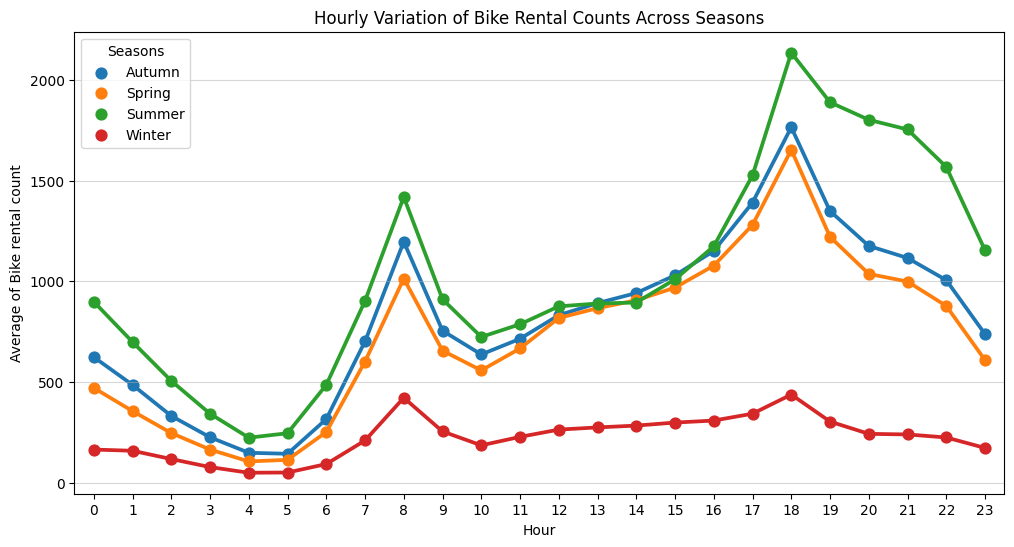

In [223]:
# Chart - 1 visualization code

# figure size
plt.figure(figsize=(12, 6))

# Create a point plot to visualize
sns.pointplot(data = season_hour_rented, x ='Hour', y ='Rented_bike_count', hue ='Seasons', ci=None, markers ='o', linestyles ='-')
plt.title('Hourly Variation of Bike Rental Counts Across Seasons')
plt.xlabel('Hour')
plt.ylabel('Average of Bike rental count')
plt.legend(title='Seasons')

plt.grid(axis ='y', linestyle ='-', alpha = 0.5)
plt.show()

##### 1. Why did you pick the specific chart?

I opted for the point plot as it serves as an effective means to depict the fluctuation in bike rentals over the course of the day within each season. This graphical representation facilitates a visual comparison of rental patterns across different seasons, enabling the detection of trends and disparities in rental counts for each hour within each seasonal context. The clarity and simplicity of this plot make it an ideal choice for conveying these insights in an easily understandable manner.

##### 2. What is/are the insight(s) found from the chart?


Seasonal variations in bike rental patterns reveal distinct trends. Summer consistently stands out with the highest rentals throughout the day. In spring, rentals reach a peak during the afternoon hours, while summer witnesses a gradual rise in rentals from morning to an evening peak. Similarly, autumn mirrors summer's pattern, showing a steady morning increase and an early evening peak. Conversely, winter portrays a stable demand for bike rentals, lacking prominent peaks, and maintaining relatively consistent rental counts. This suggests that winter's weather conditions exert a less pronounced influence on rental patterns compared to other seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: The insights derived from the point plot offer substantial advantages to bike rental businesses, potentially fueling positive growth. Effective resource management becomes achievable as businesses gain knowledge about peak rental times in various seasons. Ensuring an ample supply of bikes during these busy hours not only leads to satisfied customers but also boosts revenue. Additionally, armed with these insights, businesses can craft intelligent marketing strategies targeting high-demand periods within each season, potentially attracting more customers and driving earnings. A well-prepared approach to peak times enhances overall customer satisfaction, leading to customer retention and positive word-of-mouth recommendations. Moreover, adjusting maintenance schedules based on rental patterns minimizes the risk of bike breakdowns during busy hours, ensuring a seamless customer experience. Finally, understanding seasonal variations enables businesses to plan strategically, optimizing their bike fleet by increasing it during high-demand summer months and scaling back during the winter, effectively managing costs.

Negative impact: While these insights hold the potential for positive outcomes, they also come with possible pitfalls if not managed judiciously. Misinterpreting the data might result in resource misallocation, leading to increased costs without corresponding revenue growth or missed business opportunities due to under-allocation. Poorly executed marketing efforts during peak hours or unattractive promotions could lead to a lackluster response, potentially wasting marketing expenses. Neglecting adjustments in resource allocation and maintenance schedules during peak hours may result in bike breakdowns, dissatisfying customers and risking business loss. Moreover, failing to adapt to seasonal variations could lead to missed revenue opportunities during peak seasons and reduced profitability during high-demand periods. In conclusion, while the insights themselves do not inherently lead to negative growth, it is imperative for businesses to employ them wisely, make informed decisions, and sidestep potential pitfalls to ensure positive growth, enhanced profitability, and customer satisfaction.

#### Chart - 2

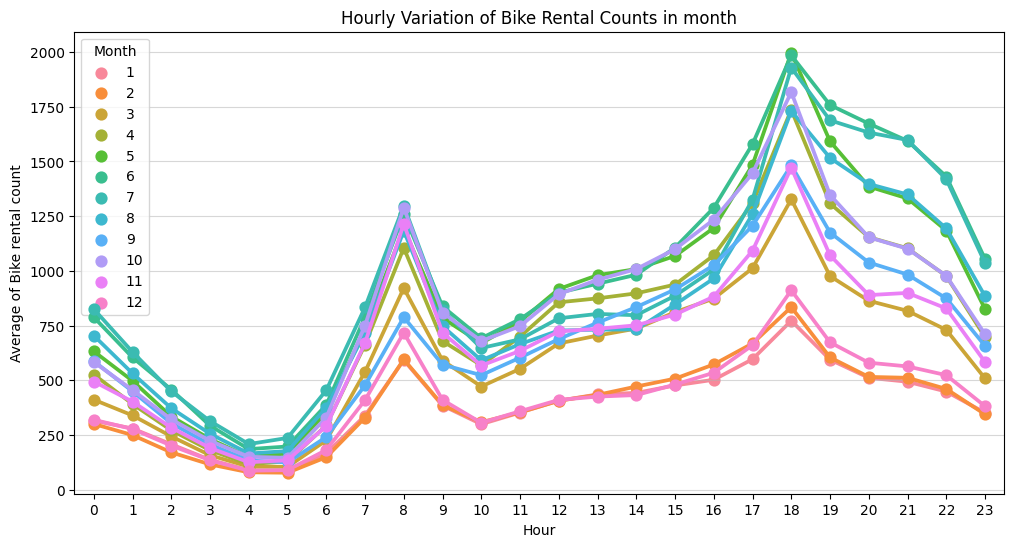

In [224]:
# Chart - 2 visualization code

# figure size
plt.figure(figsize=(12, 6))

# Create a point plot to visualize
sns.pointplot(data = hour_month_rented, x='Hour', y='Rented_bike_count', hue='Month', ci=None, markers='o', linestyles='-')
plt.title('Hourly Variation of Bike Rental Counts in month')
plt.xlabel('Hour')
plt.ylabel('Average of Bike rental count')
plt.legend(title='Month')

plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

The point plot was selected due to its suitability for comparing the number of bike rentals at various hours of the day, while also segregating the data for each month individually. This visualization aids in discerning potential trends or patterns, such as identifying months with increased rentals during specific times.

##### 2. What is/are the insight(s) found from the chart?


Monthly Variation: The point plot reveals intriguing monthly trends in bike rentals. Notably, the summer months of June, July, and August exhibit a pronounced surge in rentals, especially during late morning and early afternoon hours. This upswing suggests a preference for bike rentals in warm weather and extended daylight, likely for outdoor activities and adventures. Additionally, a consistent morning peak in bike rentals is observed across most months, indicating the reliance of some individuals on bikes for daily commutes to work or school. Similarly, evenings witness another regular peak, suggesting that bikes serve both the return journey home and post-work recreation. During the winter months like December, January, and February, bike rentals decline significantly, particularly in the early morning and late evening, aligning with the colder, darker season when outdoor activities are less favored. These insights illuminate the timing and motivations behind bike rentals throughout the year, highlighting their multifaceted role in transportation and outdoor enjoyment, thereby enabling businesses to tailor their services effectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


- Positive Business Impact:

Timing for Strategic Promotions: Businesses can strategically plan promotions during peak months like June, July, and August to capitalize on increased demand due to warm weather and extended daylight. These well-timed promotions can attract more customers, leading to higher profits.

Catering to Commuters: By ensuring an ample supply of bikes and staff during morning rush hours, bike rental services can enhance convenience for commuters, fostering customer satisfaction and loyalty.

Evening Adventures: Businesses can prepare for the evening rush, typically around 5-6 PM, by having a sufficient number of bikes available for those seeking post-work relaxation and outdoor enjoyment.

- Negative Impact:

Winter Downturn: Failure to adapt to the winter season may lead to reduced rentals and financial challenges. Planning for this quieter period is essential for sustainability.

Resource Management: Balancing resources during peak hours is crucial. Overcommitting resources during high-demand times can result in inefficiencies and increased costs if demand doesn't align with resources.

#### Chart - 3

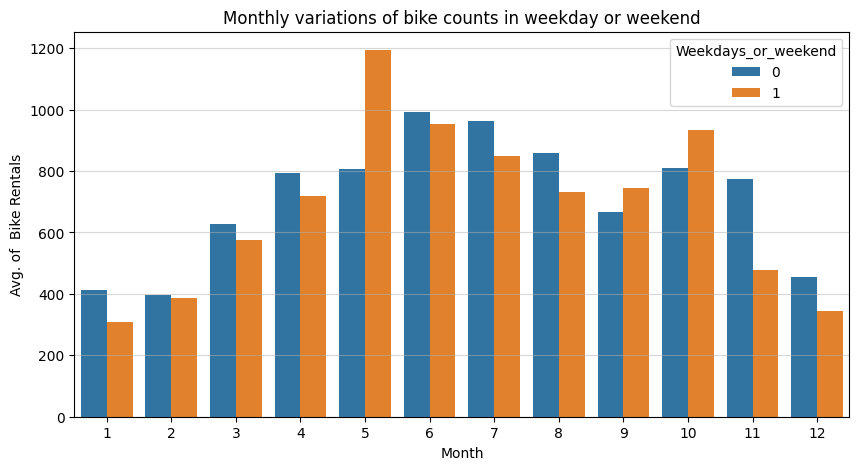

In [225]:
# Chart - 3 visualization code

# figure size
plt.figure(figsize=(10, 5))

# create a barplot
sns.barplot(x='Month', y='Rented_bike_count', hue='Weekdays_or_weekend', data=month_weekday_rented)
plt.title('Monthly variations of bike counts in weekday or weekend')
plt.xlabel('Month')
plt.ylabel('Avg. of  Bike Rentals')
plt.legend(title='Weekdays_or_weekend')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?


I chose bar plots to illustrate monthly bike rental patterns, differentiating between weekdays and weekends using distinct colors. This visualization allows for easy comparison of average rental counts across months, highlighting variations between weekdays and weekends. It offers valuable insights into rental trends throughout the year, helping businesses adapt their operations to meet customer demand effectively based on the impact of weekdays and weekends.

##### 2. What is/are the insight(s) found from the chart?


Monthly Patterns: Bike rentals generally increase during the warmer months (June, July, August) and decrease in the colder ones (December, January), aligning with seasonal weather changes. On weekdays, bike rentals tend to follow a consistent pattern with minor fluctuations, while weekends see higher rentals during summer, indicating leisurely use. Weekends exhibit more variability, with spikes in the summer months, suggesting increased recreational bike usage. Additionally, holiday months often coincide with increased rentals, especially in the summer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding the monthly rental patterns enables businesses to plan their inventory and marketing efforts effectively. For example, they can ensure an ample supply of bikes during the summer months when demand soars. Additionally, recognizing the surge in rentals during holiday months offers an opportunity for targeted marketing and promotions, further enhancing revenue.

Negative Impact: However, the decline in rentals during the winter months presents a potential negative impact. If businesses are not adequately prepared, this seasonal drop can result in negative growth. It may necessitate scaling down operations or implementing incentives to sustain customer engagement during the off-season.

#### Chart - 4

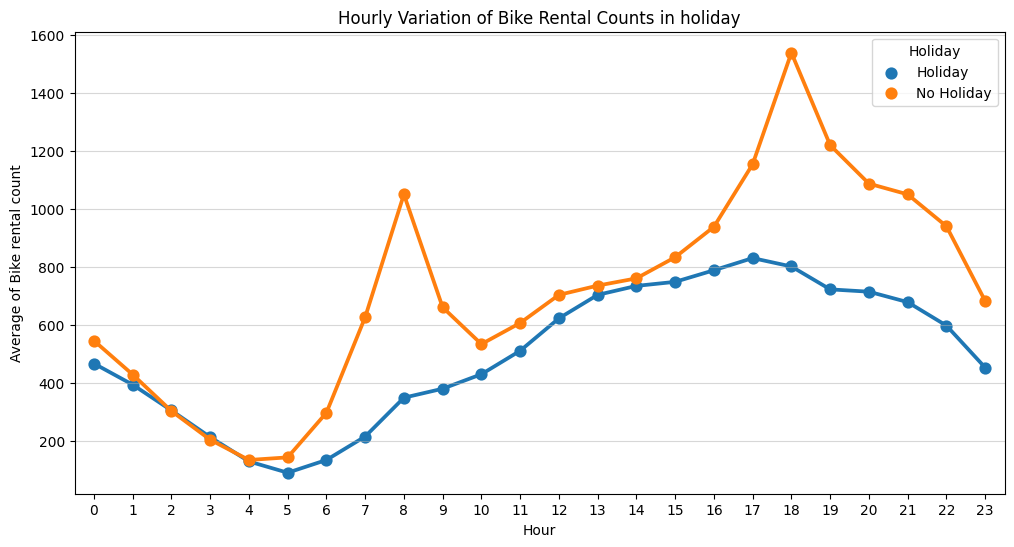

In [226]:
# Chart - 4 visualization code

# figure size
plt.figure(figsize=(12, 6))

# create a point plot
sns.pointplot(data = hour_holiday_rented, x='Hour', y='Rented_bike_count', hue='Holiday', ci=None, markers='o', linestyles='-')
plt.title('Hourly Variation of Bike Rental Counts in holiday')
plt.xlabel('Hour')
plt.ylabel('Average of Bike rental count')
plt.legend(title='Holiday')

plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

I opted for the point plot as it serves as an ideal choice for illustrating the typical variation in bike rentals throughout the day, distinguishing between holiday and non-holiday periods. This plot facilitates a straightforward comparison of rental patterns between these two categories of days. With data points represented as dots connected by lines, the point plot offers a clear visualization of trends, enabling us to readily identify shifts or disparities in rental counts at different times. In this context, it helps us pinpoint specific hours when bike rentals tend to be higher or lower on holidays compared to regular days.

##### 2. What is/are the insight(s) found from the chart?

The data reveals distinct patterns in bike rental usage between holidays and regular days. On typical workdays, there's a notable morning rush, indicating bikes are commonly used for commuting or early activities. Conversely, holidays show a different trend, with rentals gradually increasing from morning to a peak in the late afternoon, suggesting more leisure or recreational usage. Notably, holidays exhibit a steadier demand for bike rentals throughout the day compared to the fluctuations seen on regular days. This comparison of peak hours underscores the contrast between the morning rush on typical workdays and the afternoon peak on holidays. In essence, this information provides valuable insights into how people utilize bike rentals differently on holidays and regular days, enabling businesses to optimize bike availability and tailor marketing strategies to meet customer demand effectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:

Effective Resource Management: The insights gained from analyzing rental patterns allow businesses to efficiently allocate their resources, ensuring an adequate supply of bikes during peak hours. This leads to enhanced customer satisfaction and increased revenue.

Strategic Marketing: Businesses can strategically time their marketing efforts to coincide with peak rental hours, attracting more customers and boosting their earnings.

Improved Customer Experience: By being well-prepared for busy periods, businesses can provide a seamless and convenient experience for customers, leading to higher customer retention and positive word-of-mouth.

- Negative Growth:

Resource Misallocation: Misinterpreting the data may lead to overcommitting resources during specific times, resulting in increased costs without a proportional increase in revenue or resource shortages during peak demand.

Ineffective Marketing Strategies: Poorly executed marketing campaigns during peak hours or unattractive promotions can lead to wasted marketing expenses and a lack of the expected increase in rentals.

Customer Discontent: Neglecting necessary resource adjustments may result in bike breakdowns during peak rental hours, leading to customer dissatisfaction and potential revenue loss.

#### Chart - 5

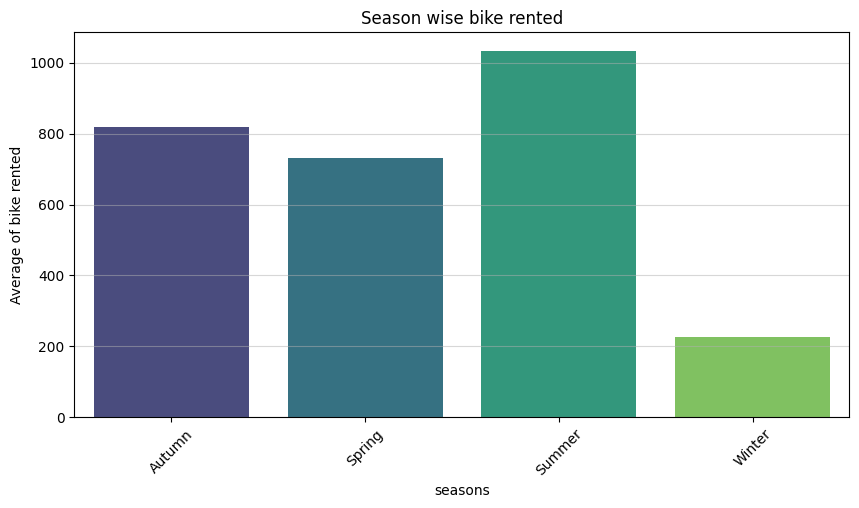

In [227]:
# Chart - 5 visualization code

fig = plt.figure(figsize=(10,5))

# create a barplot
sns.barplot(x='Seasons', y='Rented_bike_count', data=rented_season, palette='viridis')
plt.title('Season wise bike rented')
plt.xlabel('seasons')
plt.ylabel('Average of bike rented')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?


The selected bar plot effectively illustrates how different Seasons influence the bike rentals requirement. It provides a clear comparison between the Seasons, making it easy to understand the impact of seasons on bike need.

##### 2. What is/are the insight(s) found from the chart?


During the summer season, which typically spans from June to August, the demand for bikes experiences a substantial peak. This surge in demand can be attributed to the pleasant weather and longer daylight hours, which encourage people to engage in outdoor activities and explore the city using bike rentals. Conversely, during the winter season, which encompasses the months of December, January, and February, the demand for bikes significantly decreases. Colder temperatures and reduced daylight hours during winter tend to deter outdoor bike usage, resulting in the lowest bike rental demand of the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Impact: The insights gained from the analysis of bike rentals across different seasons provide valuable information for creating a positive business impact. One clear positive insight is the significant increase in bike rentals during the summer season, with a count of 1034 rentals. This indicates a strong demand for bikes during the summer months, likely driven by favorable weather conditions and outdoor activities. To capitalize on this, a bike rental business can strategically plan its inventory, ensuring an ample supply of bikes during the summer to meet the heightened demand. This, in turn, can lead to increased revenue and customer satisfaction as customers find it easier to rent bikes when they want them.

- Negative Impact: On the flip side, the analysis also highlights the winter season's lowest bike rental count, with only 225 rentals. This indicates a considerable drop in demand during the colder months. While this is a useful insight, it can potentially lead to negative growth if not managed effectively. During the winter season, maintaining a large fleet of bikes can result in unnecessary operational costs and reduced profitability, as these bikes may remain largely unused. Therefore, a careful balance is needed to optimize resources and avoid overspending during the off-season. Businesses should consider scaling down their bike fleet and focusing on other revenue-generating activities during this period to mitigate potential losses.

#### Chart - 6

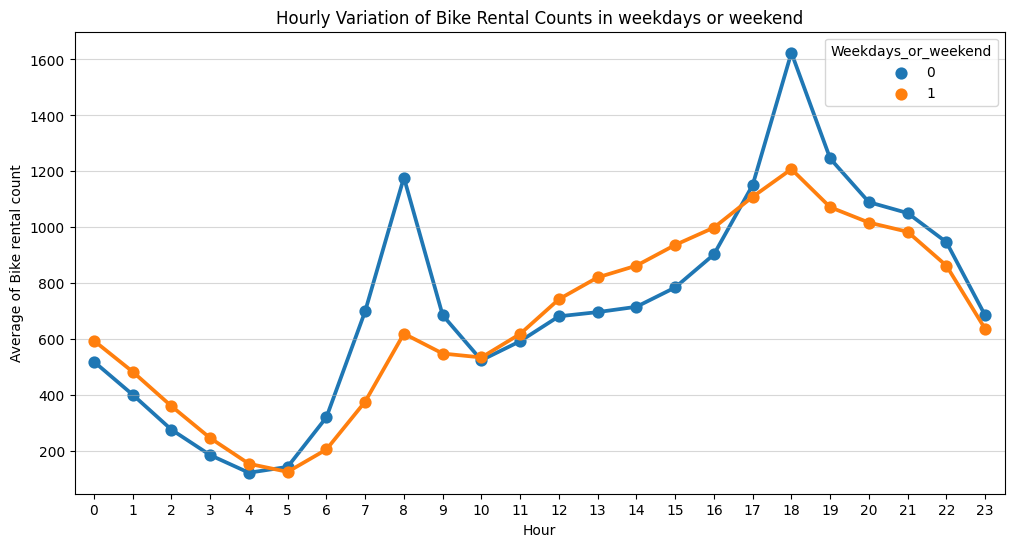

In [228]:
# Chart - 6 visualization code

# figure size
plt.figure(figsize=(12, 6))

#create a point plot
sns.pointplot(data = weeks_hourly_rented, x='Hour', y='Rented_bike_count', hue='Weekdays_or_weekend', ci=None, markers='o', linestyles='-')
plt.title('Hourly Variation of Bike Rental Counts in weekdays or weekend')
plt.xlabel('Hour')
plt.ylabel('Average of Bike rental count')
plt.legend(title='Weekdays_or_weekend')

plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?


The point plot was selected as the visualization method for its effectiveness in illustrating the hourly variations in bike rentals between weekdays and weekends. It offers a clear way to observe and compare the rental trends for different hours of the day, distinguishing between weekdays and weekends. This type of plot excels in displaying temporal patterns and variations, making it a well-suited choice for this specific analysis.

##### 2. What is/are the insight(s) found from the chart?


The rental patterns reveal distinct behaviors on workdays and weekends. Workdays see concentrated bike rentals during morning and evening hours, indicating heavy usage for daily commutes. Conversely, weekends exhibit a more consistent demand throughout the day, suggesting relaxed and leisurely bike rides. Whether on workdays or weekends, evenings emerge as a favored time for bike rentals, offering opportunities for outdoor enjoyment and recreation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:

Strategic Resource Allocation: Understanding peak rental times on workdays enables efficient resource allocation, ensuring an adequate supply of bikes and staff during high-demand periods, which leads to satisfied customers and increased revenue.

Tailored Marketing: Businesses can strategically time and design their marketing campaigns to align with specific customer preferences during weekdays and weekends. This targeted approach can attract more customers and boost rentals.

Enhanced Customer Experience: Offering additional services or experiences during busy hours, such as guided tours or quick rentals, enhances the overall customer experience, fostering customer loyalty and positive reviews.

- Negative Impact:

Overemphasis on Workdays: Over-reliance on workday demand may result in decreased profitability during slower weekends and evenings. Businesses must have strategies in place to address demand variations effectively.

Marketing Effectiveness: Ensuring that advertisements effectively capture customer attention during peak times is crucial for driving rentals. Ineffective marketing efforts during these periods can lead to missed opportunities.

Resource Management Challenge: Overcommitting resources during peak hours can strain the business's finances and operational efficiency. Maintaining a balanced approach is essential to avoid unnecessary costs.

Understanding rental preferences helps businesses prepare for high-demand periods, but they must also consider slower times and optimize their marketing strategies accordingly to maintain a healthy balance.

#### Chart - 7

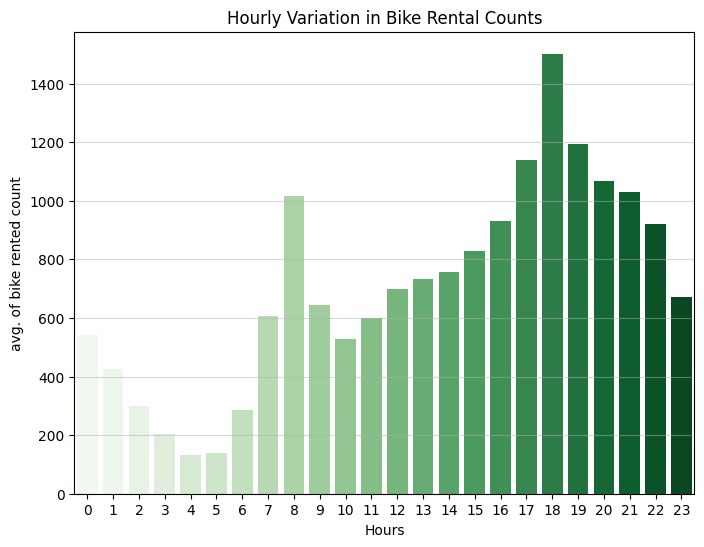

In [229]:
# Chart - 7 visualization code

# figure size
plt.figure(figsize=(8, 6))

# create a barplot
sns.barplot(x='Hour', y='Rented_bike_count', data = hourly_data, palette='Greens')
plt.title('Hourly Variation in Bike Rental Counts')
plt.xlabel('Hours')
plt.ylabel('avg. of bike rented count')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the average rented bike counts by hour because it effectively serves the purpose of identifying peak bike rental times.

- Categorical Data: The 'Hour' column represents categorical data, with each hour of the day serving as a distinct category. Bar charts are well-suited for visualizing the distribution and comparisons within categorical data, making them a suitable choice for this analysis.

- Comparison: Bar charts excel at facilitating straightforward comparisons of the average rented bike counts across different hours of the day. This attribute is particularly valuable for quickly identifying the hour or hours with the highest average bike rental counts, aligning with the primary objective of the analysis.

##### 2. What is/are the insight(s) found from the chart?

- Peak Bike Rental Time: The charts unmistakably unveil the peak bike rental time, which occurs between 18:00 and 21:00 in the afternoon. This highlights a substantial surge in bike demand during these hours, underscoring the utmost importance for bike rental businesses to ensure ample bike availability and service quality during this critical period.

- Off-Peak Hours: Conversely, the early-morning hours from 01:00 to 04:00 exhibit the lowest average rented bike counts. These time slots can be confidently identified as off-peak periods for bike rentals. In response, businesses can make resource adjustments, such as staffing and maintenance schedules, to optimize their operations and efficiently allocate resources during these quieter hours.

- Hourly Variations: The charts vividly depict significant hourly variations in bike rental activity. The discernible peaks and troughs in rental counts suggest distinct patterns throughout the day. These patterns hold considerable value for businesses in terms of planning and marketing strategies.

In summary, these visualizations offer valuable insights into the temporal dynamics of bike rentals, equipping businesses with actionable information to streamline their operations and effectively cater to customer demand throughout the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:
Optimized Resource Allocation: Understanding the peak bike rental time (18:00-21:00 hours) allows the business to allocate resources such as bikes, staff, and maintenance personnel more efficiently during high-demand periods. This ensures that customers have a positive experience with readily available bikes, which can lead to increased rentals and customer satisfaction.

Targeted Marketing: Identifying hourly variations and peak hours provides an opportunity for targeted marketing efforts. The business can run promotions, discounts, or advertising campaigns during peak hours to attract more customers and boost revenue.

Enhanced User Experience: By improving bike availability during peak times, the business can enhance the user experience, leading to customer loyalty and positive word-of-mouth recommendations.

- Negative Impact:
Resource Shortages: Failing to allocate sufficient resources during peak hours can result in bike shortages and dissatisfied customers. This can lead to negative growth as customers may turn to competitors or abandon bike rentals altogether due to unavailability.

Underutilized Resources: On the other hand, overstaffing or over-maintaining bikes during off-peak hours (01:00-04:00 hours) can lead to increased operational costs without corresponding revenue. This inefficiency can negatively impact profitability.

Ineffective Marketing Spending: If marketing efforts are not aligned with peak hours, the business may spend resources on campaigns that don't reach their intended audience. This could result in wasted marketing expenses.

#### Chart - 8

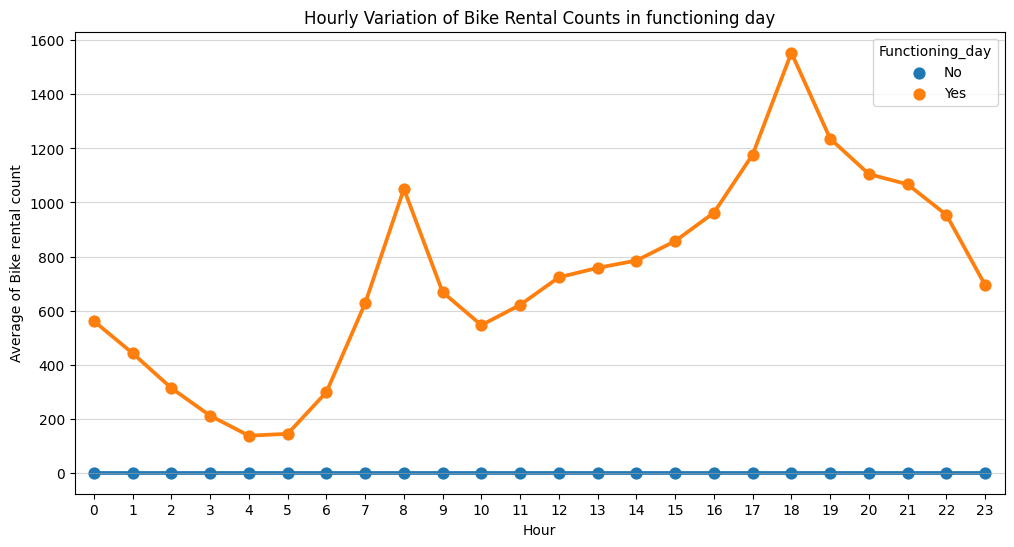

In [230]:
# Chart - 8 visualization code

# figure size
plt.figure(figsize=(12, 6))

# create a point plot
sns.pointplot(data = hour_function_rented, x='Hour', y='Rented_bike_count', hue='Functioning_day', ci=None, markers='o', linestyles='-')
plt.title('Hourly Variation of Bike Rental Counts in functioning day')
plt.xlabel('Hour')
plt.ylabel('Average of Bike rental count')
plt.legend(title='Functioning_day')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?


The selection of the point plot for visualizing bike rental patterns on both functioning and non-functioning days is based on its ability to provide a clear and effective representation of how the average number of bike rentals changes throughout the day. This choice allows for a straightforward comparison of rental patterns between these two categories, making it easy to identify any distinctions or trends. The point plot's visual clarity and simplicity make it an ideal choice for presenting this valuable information, facilitating a quick understanding of how bike rentals vary during different times of the day, depending on whether it's a functioning or non-functioning day.

##### 2. What is/are the insight(s) found from the chart?


The provided chart effectively visualizes the hourly variation in bike rentals on days when the bike rental system is functioning, and no non-functional days are included in the dataset. The observed trend reveals a consistent pattern wherein bike rentals exhibit a gradual increase from the early morning hours, reaching a peak at 6:00 PM during the afternoon, and subsequently experiencing a gradual decline into the evening. This pattern strongly indicates that individuals are more inclined to rent bikes during daylight hours, potentially for purposes such as daily commuting, recreational use, or engaging in various activities.

As there are no non-functional days included in the dataset, this specific chart solely illustrates the rental patterns on days when the bike rental system is functioning. Consequently, there is no basis for comparing rental patterns between functioning and non-functioning days within the scope of this chart. Its focus is exclusively on depicting the hourly variations in bike rentals during operational days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:
Optimized Resource Allocation: Understanding the peak bike rental times on functioning days allows businesses to allocate their resources effectively. This includes ensuring an adequate supply of bikes and staffing during high-demand periods, resulting in improved customer satisfaction and increased revenue.

Strategic Marketing: Armed with insights into when people rent bikes the most on functioning days, businesses can strategically plan their marketing efforts. Promotions and advertising campaigns during these peak hours can attract a larger customer base and enhance profitability.

Enhanced Customer Experience: By being prepared for peak times on functioning days, businesses can provide a better overall customer experience. Satisfied customers are more likely to become loyal and recommend the service to others, contributing to positive growth.

- Potential Negative Impact:
Excessive Spending: Misinterpreting the data and overallocating resources during busy times on functioning days may lead to increased operational costs without a proportional rise in revenue. This can adversely affect profitability and sustainability.

Ineffective Marketing Strategies: Poorly executed marketing efforts or unattractive deals during peak hours on functioning days may not yield the expected increase in rentals. This could result in wasted marketing expenses and potentially harm business growth.

#### Chart - 9

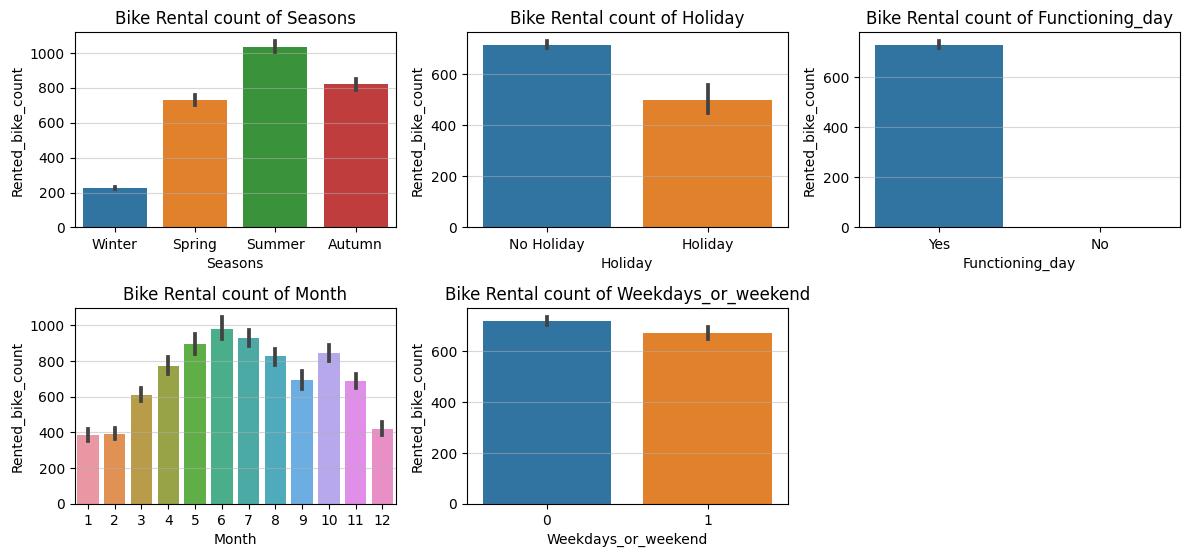

In [231]:
# Chart - 9 visualization code

# figure size
plt.figure(figsize=(12, 8))

# create a box plot
for i, column in enumerate(my_categorical_columns, 1):
  plt.subplot(3, 3, i)
  sns.barplot(x=bike_data[column],y=bike_data['Rented_bike_count'])
  plt.title(f'Bike Rental count of {column}')
  plt.xlabel(column)
  plt.grid(axis='y', linestyle='-', alpha=0.5)

# Adjust layout and display
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


I selected bar plots as the preferred visualization method for exploring the distribution of categorical variables such as Functioning_day, Month, Weekdays_or_weekend, Seasons, and Holiday. This choice aligns with the effectiveness of bar plots in illustrating the frequency of each category within a categorical variable. Bar plots offer a straightforward means of comparing the occurrence rates of different categories, enabling the swift identification of both the most prevalent and the least common categories within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights found from visualizing the distribution of the categorical variables ("Seasons," "Holiday," "Functioning_day," "Month," and "Weekdays_or_weekend") using bar plots are as follows:

- Seasons:
The bar plot representing "Seasons" provides a clear depiction of how bike rentals are distributed throughout the various seasons, including spring, summer, autumn, and winter. Analyzing this plot allows us to discern which season experiences the highest and lowest bike rentals. Notably, summer emerges as the season with the highest rentals, likely owing to the pleasant weather conditions conducive to outdoor activities. Conversely, winter stands out with the lowest rental counts, reflecting the impact of colder and less favorable weather conditions on bike rental patterns.
- Holiday: The "Holiday" bar plot effectively illustrates the fluctuations in bike rentals between holiday and non-holiday periods. This visualization serves as a valuable tool for gaining insights into the influence of holidays on bike rental trends. Businesses can leverage this information to tailor their strategies, implementing holiday-specific promotions or making staffing adjustments to cater to the distinct demands during these special occasions.
- Functioning day: The "Functioning_day" chart effectively distinguishes rental patterns between days when the bike rental station is functioning normally (yes) and days when it's not (No). This information proves valuable in optimizing operational and maintenance schedules, particularly for non-functioning days. By analyzing these patterns, businesses can make informed decisions about resource allocation and ensure that they are adequately prepared for both types of days, enhancing overall efficiency and customer satisfaction.
- Month: The "Month" bar plot effectively presents the distribution of bike rentals across various months throughout the year. This visualization allows for valuable insights into monthly trends and seasonal variations in rental counts. Notably, it highlights that June, followed by July and May, experience the highest bike rental counts. This information is essential for businesses to adapt their strategies and resource management to accommodate the fluctuating demand observed across different months, ultimately optimizing their operations and customer satisfaction.
- Weekdays or Weekend: The bar plot representing weekdays (1) versus weekends (0) effectively showcases rental counts, with weekdays generally exhibiting slightly higher bike counts than weekends. This visualization is instrumental in assessing potential disparities in bike rentals between weekdays and weekends, offering valuable insights for staffing, resource allocation, and marketing decisions. Businesses can use this information to tailor their strategies and services to meet the specific demands of both weekdays and weekends, ultimately enhancing their operational efficiency and customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from visualizing categorical variables can have a positive impact on a bike rental company's operations. These visualizations allow businesses to understand rental patterns across different seasons, holidays, functioning days, months, and weekdays versus weekends. This knowledge enables them to optimize resource allocation, plan targeted marketing strategies, and enhance the overall customer experience. However, it's crucial to approach these insights carefully to avoid potential negative consequences. Overcommitting resources during certain seasons or holidays, mismanaging operations on non-functioning days, or overspending on marketing during specific months could lead to negative growth and increased costs. Therefore, while these insights offer opportunities for positive outcomes, businesses must use them judiciously to ensure they contribute to growth and profitability.

#### Chart - 10

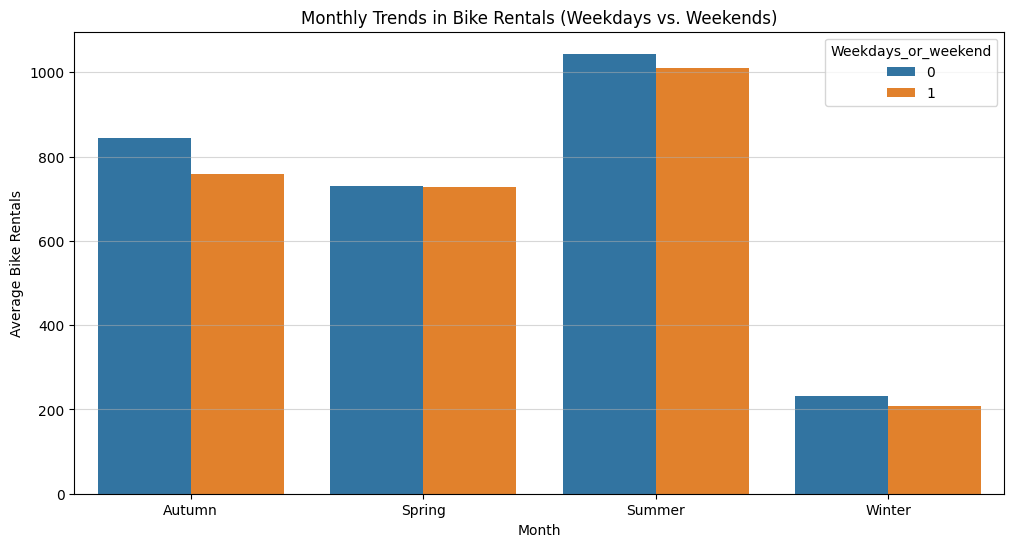

In [232]:
# Chart - 10 visualization code

# figure size
plt.figure(figsize=(12, 6))

# create barplot
sns.barplot(x ='Seasons', y ='Rented_bike_count', hue ='Weekdays_or_weekend', data = weekday_season_rented)
plt.title('Monthly Trends in Bike Rentals (Weekdays vs. Weekends)')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.legend(title ='Weekdays_or_weekend')
plt.grid(axis ='y', linestyle ='-', alpha = 0.5)
plt.show()

##### 1. Why did you pick the specific chart?

I selected the barplot for visualizing the distribution of categorical variables like "Seasons" and "Weekdays_or_weekend" because it is a suitable plot for showing the frequency of each category within these variables. Barplots provide a clear and effective way to compare the frequencies of different categories and quickly identify the most common and least common categories within each variable. This is especially useful when analyzing categorical data and looking for patterns or variations in the data. Additionally, by using different colors or grouping, barplots can also help compare categories across multiple variables, as seen in the code you provided where the hue represents "Weekdays_or_weekend" within each "Season." This choice of chart allows for easy visualization and comparison of categorical data, making it a practical choice for your project.

##### 2. What is/are the insight(s) found from the chart?


From the chart displaying bike rentals categorized by weekdays (Weekdays_or_weekend = 1) and weekends (Weekdays_or_weekend = 0) within different seasons, we can gather the following insights:

- Seasonal Variation: The chart illustrates how the number of rented bikes varies between weekdays and weekends across different seasons. Notably, in each season (Autumn, Spring, Summer, and Winter), there are differences in bike rentals between weekdays and weekends.

- Higher Weekend Rentals in Summer: In the Summer season, we observe that bike rentals are higher on weekends (Weekdays_or_weekend = 0) compared to weekdays (Weekdays_or_weekend = 1). This suggests that people prefer renting bikes for leisure or outdoor activities on weekends when the weather is pleasant.

- Consistent Rentals in Other Seasons: In the Autumn, Spring, and Winter seasons, the difference in bike rentals between weekdays and weekends is less pronounced. Bike rentals remain relatively consistent, indicating that people may use bikes for both commuting and leisure activities throughout the week.

- Potential for Seasonal Marketing: Businesses can use these insights to tailor their marketing efforts based on the season. For example, during the Summer season, they can focus on promoting weekend bike rentals for recreational purposes, while in other seasons, they can maintain consistent services throughout the week.

Overall, the chart provides valuable insights into how bike rentals vary between weekdays and weekends across different seasons, offering opportunities for businesses to optimize their operations and marketing strategies accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart depicting bike rentals by weekdays (Weekdays_or_weekend = 1) and weekends (Weekdays_or_weekend = 0) within different seasons offer several considerations that could potentially lead to both positive and negative business impacts:

Positive Business Impact:

- Seasonal Marketing Opportunities: The data suggests variations in bike rentals between weekdays and weekends, particularly in the Summer season. This presents an opportunity for businesses to create seasonal marketing campaigns that target weekend rentals during the Summer. Offering special promotions or packages for weekend rentals in the Summer could attract more customers and increase revenue.

- Resource Allocation: Understanding the differences in rental patterns between weekdays and weekends can help businesses allocate resources more efficiently. For example, they can have more staff and bikes available on weekends during the Summer to meet the increased demand.

Negative Growth Considerations:

- Potential Resource Imbalance: While catering to weekend demand in the Summer can be lucrative, it's essential for businesses to strike the right balance in resource allocation. Overcommitting resources on weekends may lead to higher operational costs if the demand doesn't meet expectations, potentially impacting profitability.

- Neglecting Other Seasons: Focusing too heavily on Summer weekend rentals might lead to neglecting rental opportunities in other seasons or during weekdays. This could result in missed revenue during non-peak times.

- Weather Dependency: The higher demand for weekend rentals during the Summer is likely weather-dependent. If the weather takes an unexpected turn, businesses relying solely on Summer weekend rentals may face a significant drop in revenue.

In conclusion, while the insights from the chart offer opportunities for positive business impact, businesses should approach these opportunities with a balanced strategy. By carefully planning resource allocation, marketing efforts, and considering seasonal variations, they can maximize the positive impact and minimize the potential negative consequences on growth.

#### Chart - 11

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'Month',
       'Weekdays_or_weekend'],
      dtype='object')

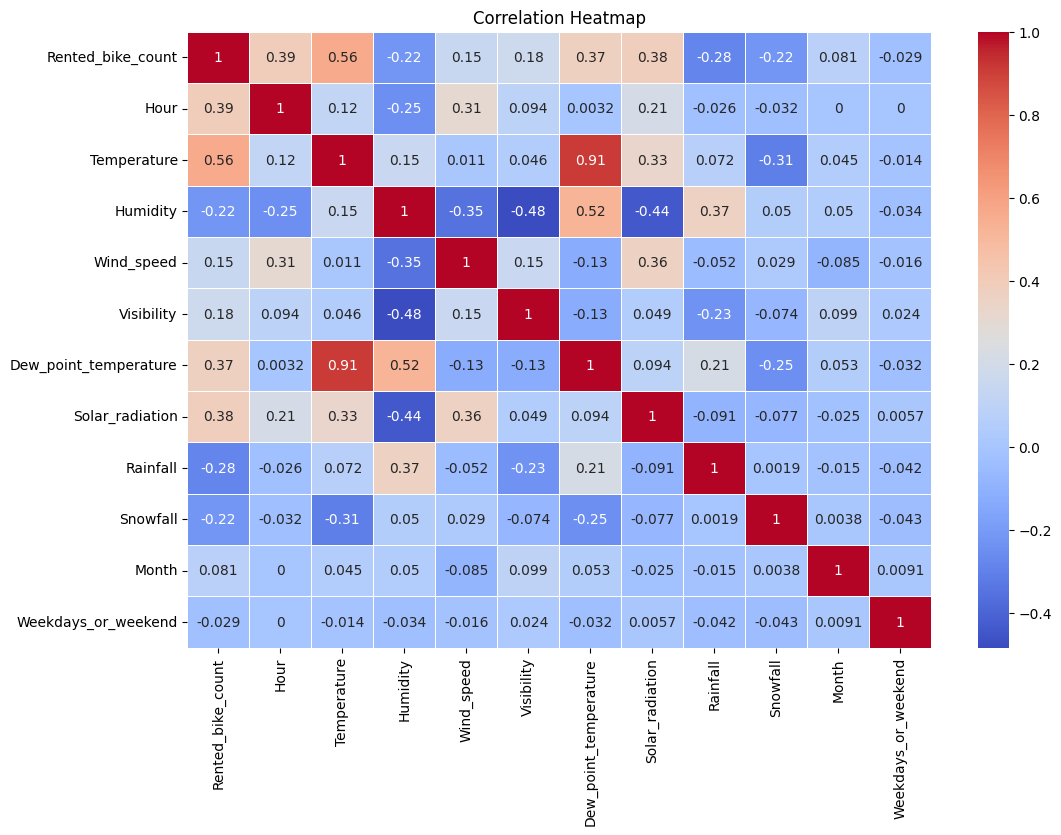

In [233]:
# Chart - 11 visualization code

corr = bike_data.corr(method='spearman')
fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth = 0.5)
plt.title('Correlation Heatmap')
bike_data.columns

##### 1. Why did you pick the specific chart?

We opted for a heatmap as it offers a succinct and visually intuitive way to depict the correlations among all the quantitative variables in our dataset. This color-coded heatmap, enriched with annotations, presents a rapid and lucid overview of the interrelationships and trends among these variables, making it a valuable tool for our analysis.

##### 2. What is/are the insight(s) found from the chart?

- Rented Bike Count Relationship: The rented bike count exhibits its strongest correlation with temperature, closely followed by hour and dew point temperature. This indicates that these factors wield significant influence over bike rentals.

- Temperature and Solar Radiation: There exists a positive correlation between temperature and solar radiation, signifying that sunnier days with higher temperatures often go hand in hand.

- Temperature and Dew Point: A robust positive correlation between temperature and dew point temperature suggests a tendency for these variables to rise and fall together, potentially hinting at multicollinearity.

- Humidity and Solar Radiation: Humidity and solar radiation showcase a negative correlation, implying that elevated humidity levels are linked to reduced solar radiation or sunshine.

- Humidity and Visibility: The most pronounced negative correlation emerges between humidity and visibility, implying that as humidity increases, visibility tends to decrease.

It's important to note that the strong correlation between temperature and dew point temperature may indicate multicollinearity, which can be addressed using techniques like VIF (Variance Inflation Factor) during regression analysis to avoid issues of collinearity.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

pair_columns = ['Rented_bike_count','Temperature',"Humidity", 'Wind_speed',"Visibility","Dew_point_temperature","Solar_radiation","Rainfall","Snowfall"]
sns.pairplot(bike_data[pair_columns], diag_kind='kde')
plt.title('Pair Plot of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was selected due to its suitability for simultaneously visualizing relationships and patterns among multiple numerical variables. This visualization technique offers valuable insights into correlations, distributions, and potential data trends, rendering it an invaluable asset for exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

- Temperature vs. Rented Bike Count: There is a positive correlation between temperature and rented bike count. As temperature increases, more bikes tend to be rented, indicating that people are more likely to rent bikes on warmer days.

- Hour vs. Rented Bike Count: The hourly distribution of rented bike counts shows certain peak hours when bike rentals are higher. This suggests potential demand patterns throughout the day.

- Humidity vs. Rented Bike Count: There doesn't appear to be a strong linear correlation between humidity and rented bike count, indicating that humidity alone may not significantly impact bike rental behavior.

- Rainfall vs. Rented Bike Count: Bike rentals seem to decrease when there is rainfall. This is evident from the clusters of points with low bike rentals when rainfall is present.

- Snowfall vs. Rented Bike Count: Similarly, bike rentals are significantly lower when there is snowfall. Points cluster near zero bike rentals during snowfall.

- Dew Point Temperature vs. Rented Bike Count: Dew point temperature shows a positive correlation with rented bike count, similar to temperature. This suggests that both temperature and dew point temperature have a similar impact on bike rentals.

- Wind Speed vs. Rented Bike Count: There doesn't seem to be a strong linear relationship between wind speed and rented bike count, indicating that wind speed alone may not be a primary factor affecting bike rentals.

- Solar Radiation vs. Rented Bike Count: Higher solar radiation levels are associated with increased bike rentals. This indicates that sunny days encourage more people to rent bikes.

- Visibility vs. Rented Bike Count: Visibility doesn't show a strong linear correlation with bike rentals, suggesting that visibility alone may not be a key factor influencing bike rental patterns.

- Month vs Rented Bike Count:month also not slowing any kind of stong relation with bike rentals.

- Temperature and Dew Point:A strong positive correlation between temperature and dew point temperature implies that these variables tend to rise and fall together, potentially indicating multicollinearity.

- Skewness: Most columns exhibit right-skewed distributions, meaning data points are concentrated at lower values and tail off towards higher values. This suggests that features are following non-uniform distributions.

To gain a deeper understanding of the relationship between "Rented Bike Count" and the other numerical columns, we are going to use regression plots to provide clear and insightful visualizations.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

numeric_variable = ['Rented_bike_count','Temperature',"Humidity", 'Wind_speed',"Visibility","Dew_point_temperature","Solar_radiation","Rainfall","Snowfall"]

# Create subplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=bike_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


I opted for the box plot as a means of identifying outliers owing to its capacity to succinctly illustrate data distributions and highlight potential outliers in a visually intuitive manner. Its ability to promptly identify data points that substantially differ from the dataset's overall pattern makes it an effective tool for outlier analysis. The box plot is widely embraced in data analysis for its role in identifying and gaining insights into outlier behavior, while also enabling efficient comparisons across multiple columns.

##### 2. What is/are the insight(s) found from the chart?

- Visibility, Dew_point_temperature, Temperature, and Humidity features exhibit distributions without any noticeable outliers. These features seem to maintain a consistent and stable pattern without any extreme values.

- Conversely, the Rented_bike_count, Wind_speed, Solar_radiation, Rainfall, and Snowfall columns display data points that extend beyond the upper whisker, indicating that certain features have a higher-than-average number of bike rentals, possibly influenced by natural phenomena.

It's important to emphasize that the presence of outliers doesn't automatically necessitate their removal. Instead, there are diverse strategies available, such as data scaling or transformation, to mitigate their influence on subsequent analyses. Nevertheless, it's crucial to conduct additional examination to gain a comprehensive understanding of these outliers and their potential ramifications on the overall analysis. Thoughtful deliberation and domain expertise will be crucial in determining the most effective approach for managing these atypical data points.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement-1: There is a relationship between Month and Rented bike count.

Statement-2: There is a relationship between Hour and Rented bike count.

Statement-3: There is a relationship between Temperature and Dew point temperature.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between Month and Rented bike count.

Alternative Hypothesis: There is a relationship between Month and Rented bike count.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

null_hypothesis = 'There is no relationship between Month and Rented bike count'
alt_hypothesis = 'There is a relationship between Month and Rented bike count'

# Perform linear regression
x = sm.add_constant(bike_data['Month'])
y = bike_data['Rented_bike_count']
model = sm.OLS(y, x).fit()

# print statistics
print(model.summary())

# Extract p-value
p_value = model.pvalues[1]
print('p-value: ', p_value)

##### Which statistical test have you done to obtain P-Value?

The statistical test that has been performed to obtain the p-value in this analysis is Linear Regression. Specifically, the p-value corresponds to the hypothesis test for the coefficient of the 'Month' variable in the linear regression model. The null hypothesis (H0) is that there is no relationship between the 'Month' variable and the 'Rented bike count,' while the alternative hypothesis (H1) is that there is a relationship between them.

The p-value obtained (3.144647620349008e-11) is used to assess the significance of the relationship between 'Month' and 'Rented bike count.' In this case, the extremely small p-value (close to zero) indicates strong evidence against the null hypothesis, suggesting that there is indeed a statistically significant relationship between the month and the number of rented bikes.

In summary, the p-value obtained from the linear regression analysis helps determine whether the 'Month' variable has a significant impact on the 'Rented bike count,' and in this case, it indicates a significant relationship.

##### Why did you choose the specific statistical test?

The specific statistical test chosen for this analysis is linear regression. Linear regression is a suitable choice when we want to explore the relationship between one or more predictor variables (in this case, 'Month') and a target variable ('Rented bike count'). It allows us to understand how changes in the predictor variable(s) are associated with changes in the target variable.

In this analysis, the goal was to determine whether there is a significant relationship between the month of the year ('Month') and the number of rented bikes ('Rented bike count'). By using linear regression, we can quantify the strength and direction of this relationship. The results of the regression, including the coefficients, p-values, and R-squared values, provide valuable insights into whether the month of the year has a statistically significant impact on bike rentals. The low p-value of approximately 3.14e-11 indicates that there is indeed a significant relationship between the month and bike rentals, justifying the choice of this statistical test.

In summary, linear regression was chosen as the statistical test because it is well-suited for assessing the relationship between a predictor variable (month) and the target variable (bike rentals). The results help us understand the impact of the month of the year on bike rentals and provide a basis for making data-driven decisions in business planning and resource allocation.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between Hour and Rented bike count.

Alternative Hypothesis: There is a relationship between Hour and Rented bike count.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

null_hypothesis = 'There is no relationship between Hour and Rented bike count'
alt_hypothesis = 'There is a relationship between Hour and Rented bike count'

# Perform linear regression
x = sm.add_constant(bike_data['Hour'])
y = bike_data['Rented_bike_count']
model = sm.OLS(y, x).fit()

# print summary
print(model.summary())

# Extract p-value
p_value = model.pvalues[1]
print('p-value: ', p_value)

##### Which statistical test have you done to obtain P-Value?

The statistical test conducted to obtain the p-value in this analysis is simple linear regression. Specifically, we used linear regression model to explore the relationship between the predictor variable 'Hour' (representing the time of day) and the target variable 'Rented bike count' (the number of rented bikes). The goal was to determine whether there is a statistically significant relationship between the time of day and bike rentals.

In this context, the linear regression model assesses how changes in the time of day are associated with changes in the number of bike rentals. The obtained results, including the coefficients, R-squared value, and the p-value, help us understand the strength and direction of this relationship. The exceptionally low p-value of 0.0 indicates a highly significant relationship between the time of day and bike rentals, suggesting that the time of day plays a crucial role in influencing bike rental counts. This statistical test, therefore, provides valuable insights into the impact of the hour on bike rentals, supporting data-driven decision-making in business strategies and resource allocation.

##### Why did you choose the specific statistical test?


The specific statistical test chosen in this analysis is linear regression. Linear regression is selected here because it is suitable for examining the relationship between two continuous variables, in this case, the "Hour" (time of day) and the "Rented_bike_count" (the number of bikes rented).

The goal was to understand whether there is a significant association between the time of day (represented by the hour) and the number of bike rentals. By using linear regression, we can model this relationship and assess its statistical significance. The coefficients, p-values, and other statistics provided in the regression output allow us to determine whether the hour of the day has a statistically significant impact on bike rental counts.

In summary, linear regression was chosen as the statistical test because it is well-suited for examining the relationship between two continuous variables and assessing the significance of that relationship, which is crucial in understanding how time of day influences bike rental patterns.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between Temperature and Dew point temperature.
Alternative Hypothesis: There is a relationship between Temperature and Dew point temperature.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

null_hypothesis = 'There is no relationship between Temperature and Dew point temperature'
alt_hypothesis = 'There is a relationship between Temperature and Dew point temperature'

x = sm.add_constant(bike_data['Dew_point_temperature'])
y = bike_data['Temperature']
model = sm.OLS(y, x).fit()

# print statistics
print(model.summary())

# Extract p-value
p_value = model.pvalues[1]
print('p-value: ', p_value)

##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value in this analysis is linear regression. Linear regression is used to assess the relationship between two continuous variables, in this case, "Dew_point_temperature" and "Temperature." The null hypothesis (H0) states that there is no relationship between these two variables, while the alternative hypothesis (H1) suggests that there is a relationship between them.

In the output summary, we can observe various statistics, including the coefficient values, standard errors, t-statistics, and, most importantly, the p-value. The p-value associated with the "Dew_point_temperature" variable helps us determine whether there is a statistically significant relationship between dew point temperature and temperature. In this specific case, the p-value is extremely low (close to zero), indicating strong evidence to reject the null hypothesis. Therefore, we conclude that there is indeed a significant relationship between dew point temperature and temperature based on the linear regression analysis.

##### Why did you choose the specific statistical test?

The specific statistical test chosen for this analysis is linear regression. Linear regression is selected because it is well-suited for examining the relationship between two continuous variables, which in this case are "Dew_point_temperature" and "Temperature." The primary objective is to determine if there exists a significant and meaningful association between these two meteorological variables.

In linear regression, we formulate a null hypothesis (H0) that states there is no relationship between the independent variable (Dew_point_temperature) and the dependent variable (Temperature). The alternative hypothesis (H1) asserts that there is indeed a relationship between these variables. By conducting a linear regression analysis, we can estimate the coefficients and assess the statistical significance of the relationship.

The output summary of the linear regression provides essential statistics, including the coefficient values, standard errors, t-statistics, and the p-value. The p-value, in particular, is crucial in determining whether the relationship is statistically significant. In this specific case, the extremely low p-value (close to zero) suggests strong evidence against the null hypothesis, leading us to conclude that there is a statistically significant relationship between dew point temperature and temperature. Therefore, linear regression is the appropriate statistical test for exploring this relationship in the data.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***